In [3]:
import os

import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data_folder = "../data/"
# Get a list of all CSV files in the data folder
csv_files = [file for file in os.listdir(data_folder) if file.endswith(".csv")]

# Read each CSV file into a pandas dataframe and store them in a dictionary
dataframe_dict = {file[: file.find("-")]: pd.read_csv(os.path.join(data_folder, file), header=0) for file in csv_files}
print("list of .csv files: ", list(dataframe_dict.keys()))

list of .csv files:  ['ethanol', 'oats', 'wheat', 'sugarcane', 'canola', 'soybean', 'corn', 'gasolinerbob']


In [5]:
dataframe_dict["wheat"].head(7)

,Symbol,Time,Open,High,Low,Last,Change,%Chg,Volume,Open Int
0,ZWH00,2000-01-03,249.00,251.5,245.25,247.50,-1.00,-0.40%,33410,122038
1,ZWH00,2000-01-04,247.50,248.0,241.00,247.25,-0.25,-0.10%,48770,124913
2,ZWH00,2000-01-05,247.25,250.0,246.00,249.75,2.50,+1.01%,42672,124335
3,ZWH00,2000-01-06,250.00,251.0,247.50,248.50,-1.25,-0.50%,39286,125219
4,ZWH00,2000-01-07,248.25,252.0,246.00,251.75,3.25,+1.31%,41426,127130
5,ZWH00,2000-01-10,251.25,255.0,248.75,253.50,1.75,+0.70%,45158,128204
6,ZWH00,2000-01-11,253.50,256.0,251.50,253.75,0.25,+0.10%,47196,127807


In [6]:
# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate over each dataframe in the dictionary
for key, df in dataframe_dict.items():
    # Select only the 'Date' and 'Last' columns and create a copy
    temp_df = df[["Time", "Last"]].copy()
    # Rename the 'Close' column to the name of the commodity
    temp_df.columns = ["Date", f"{key}"]

    # If combined_df is empty, assign temp_df to it (i.e., first iteration)
    if combined_df.empty:
        combined_df = temp_df
    else:
        # Merge the temp_df with combined_df on 'Date' column
        combined_df = pd.merge(combined_df, temp_df, on="Date", how="outer")

combined_df.set_index("Date", inplace=True)
combined_df.head()

,ethanol,oats,wheat,sugarcane,canola,soybean,corn,gasolinerbob
Date,,,,,,,,
2000-01-03,1.286,108.25,247.50,6.10,251.7,456.50,200.75,NaN
2000-01-04,1.285,109.00,247.25,5.77,251.3,464.25,203.00,0.6850
2000-01-05,1.286,109.25,249.75,5.81,252.6,469.25,203.00,0.6758
2000-01-06,1.280,109.00,248.50,5.77,254.7,468.00,203.75,0.6789
2000-01-07,1.280,109.50,251.75,5.84,256.5,471.50,207.00,0.6610


In [7]:
# Find the first non-NA/null index for each column in the combined dataframe
first_non_na_indices = combined_df.apply(lambda col: col.first_valid_index())

# Print the indices of the first non-NA/null values for each column
print(first_non_na_indices)

ethanol         2000-01-03
oats            2000-01-03
wheat           2000-01-03
sugarcane       2000-01-03
canola          2000-01-03
soybean         2000-01-03
corn            2000-01-03
gasolinerbob    2000-01-04
dtype: object


In [8]:
# Interpolate missing values in the combined dataframe using linear interpolation
interpolated_df = combined_df.interpolate(method="linear")

# Select data from a specific index onwards
data_df = interpolated_df[first_non_na_indices.max() :]

In [9]:
# Save the data_df to a CSV file
data_df.to_csv("data.csv")

Text(0.5, 0, 'Date')

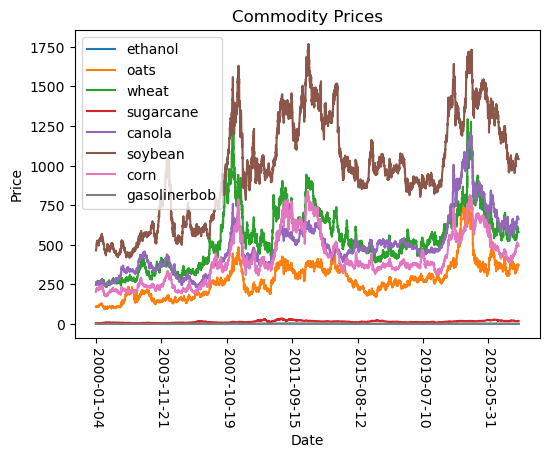

In [10]:
data_df.plot(figsize=(6, 4), title="Commodity Prices")
plt.xticks(rotation=-90)
plt.ylabel("Price")
plt.xlabel("Date")